# Annual Race Review

In [1]:
import pandas as pd
import numpy as np
import datetime
import os


# Viz libs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# display options
# pd.options.display.float_format = "{:.2f}".format


import set_config


In [2]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
# dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))

dir_sanofi_share is /Users/mark/Sanofi/Sanofi x McLaren sharing - General/
dir_local is /Users/mark/Documents


In [93]:
def read_excel_file(passed_dir, filename):
    path = os.path.join(passed_dir, filename)
    temp_df = pd.read_excel(path)
    return temp_df

folder = 'Race Dashboard data'

file = ('df_weekly_with_calcs.xlsx')

path = os.path.join(dir_sanofi_share, folder)
                    
df = read_excel_file(path, file)

df[['OEE %','Changeover','Unplanned_tech_loss','Changeover_rolling_mean', 'OEE_Diff','Changeover_Diff']] = df[['OEE %','Changeover','Unplanned_tech_loss','Changeover_rolling_mean','OEE_Diff','Changeover_Diff']].mul(100)


Line
FRA - Devices Pens, AL5 Packaging 1    AxesSubplot(0.125,0.125;0.775x0.755)
FRA - Devices Pens, AL6                AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M18 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M21 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
FRA - FF NLP, M22 Filling              AxesSubplot(0.125,0.125;0.775x0.755)
LLB - Bosch-2 Packaging (SOLD)         AxesSubplot(0.125,0.125;0.775x0.755)
LLB - IMA-2 Packaging (SOLD)           AxesSubplot(0.125,0.125;0.775x0.755)
LSX - SUPPO Packaging Line             AxesSubplot(0.125,0.125;0.775x0.755)
LSX - TR200 Packaging Line             AxesSubplot(0.125,0.125;0.775x0.755)
LTR - C5 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
MAF - C2 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
MAF - C9 Packaging Line                AxesSubplot(0.125,0.125;0.775x0.755)
SCO - GAMMA1                           AxesSubplot(0.125,0.125;0.775x0.755)
SCO - I

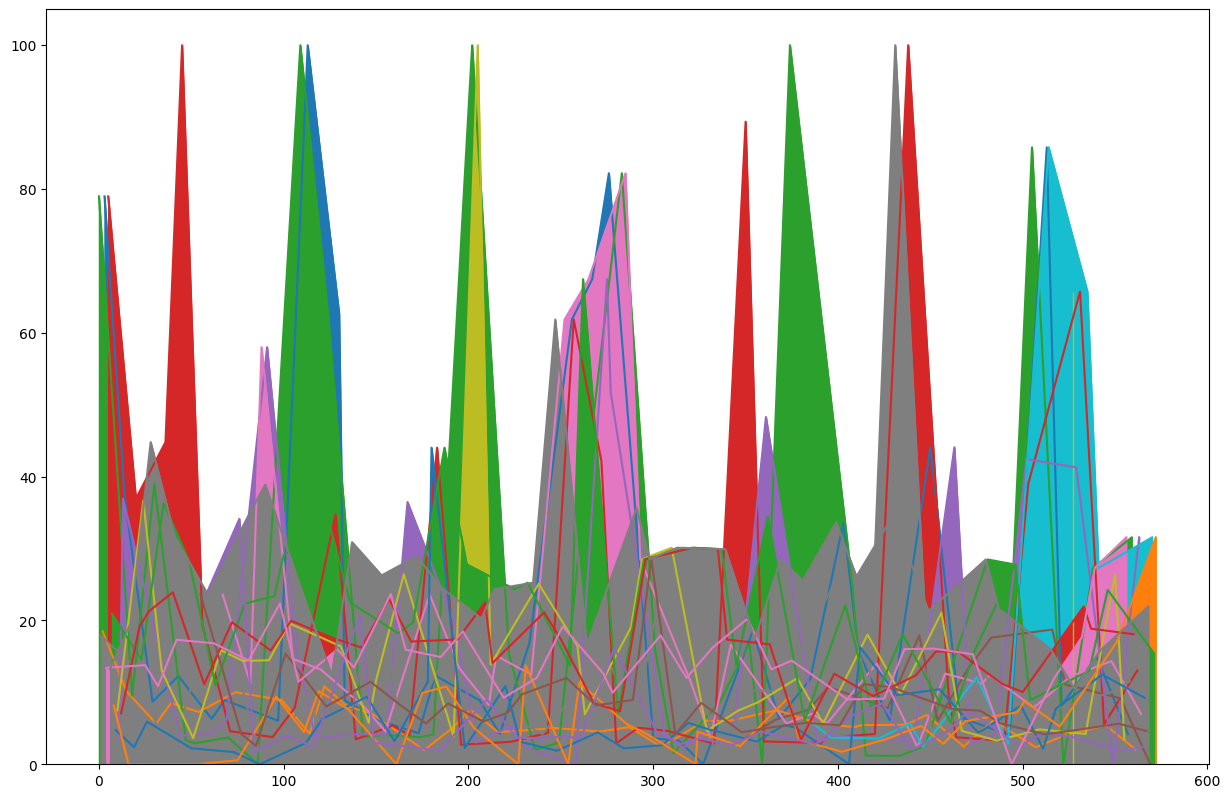

In [94]:
df.groupby('Line').Changeover.plot.area(figsize=(15,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

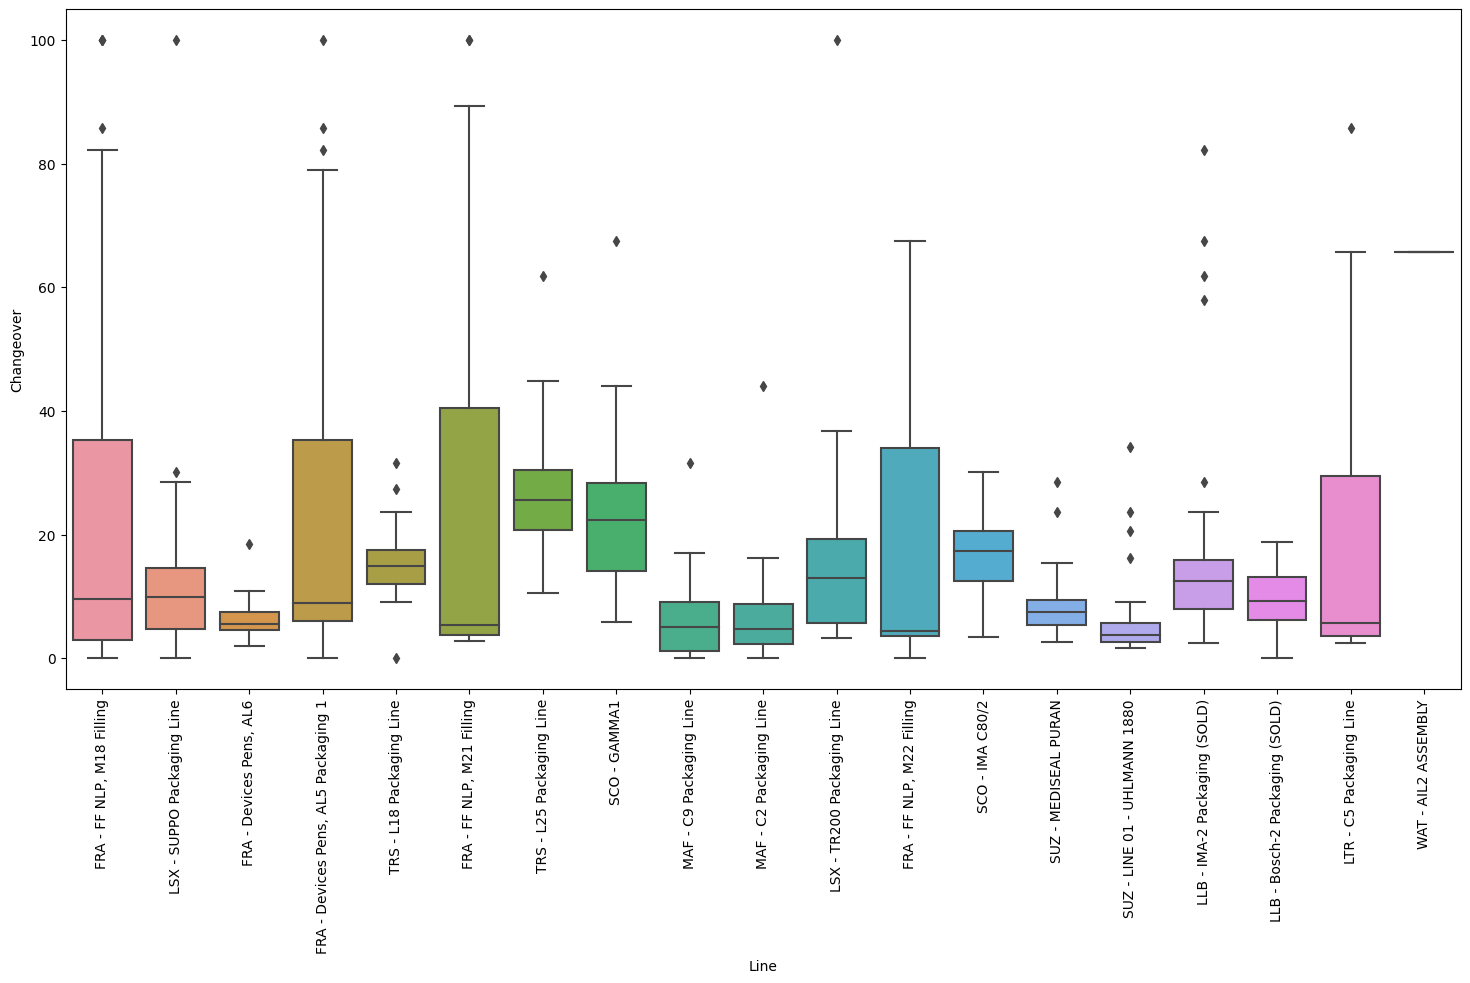

In [95]:
plt.figure(figsize=(18,9))

sns.boxplot(data=df, x='Line', y='Changeover')
plt.xticks(rotation=90)

In [96]:
# plt.figure(figsize=(18,9))

px.box(df, x='Line', y='Changeover', notched=True)
# plt.xticks(rotation=90)

<Figure size 1500x1000 with 0 Axes>

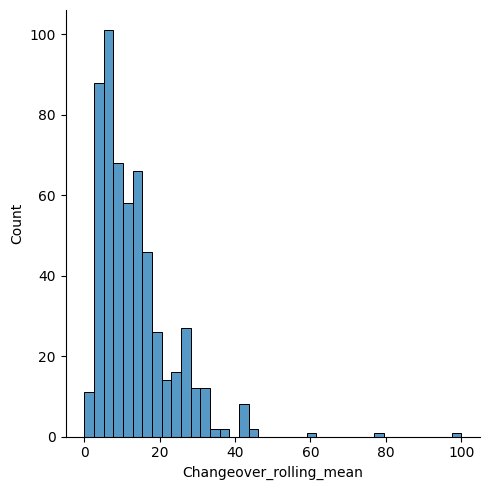

In [97]:
plt.figure(figsize=(15,10))
sns.displot(df, x='Changeover_rolling_mean')

Text(0, 0.5, 'Changeover')

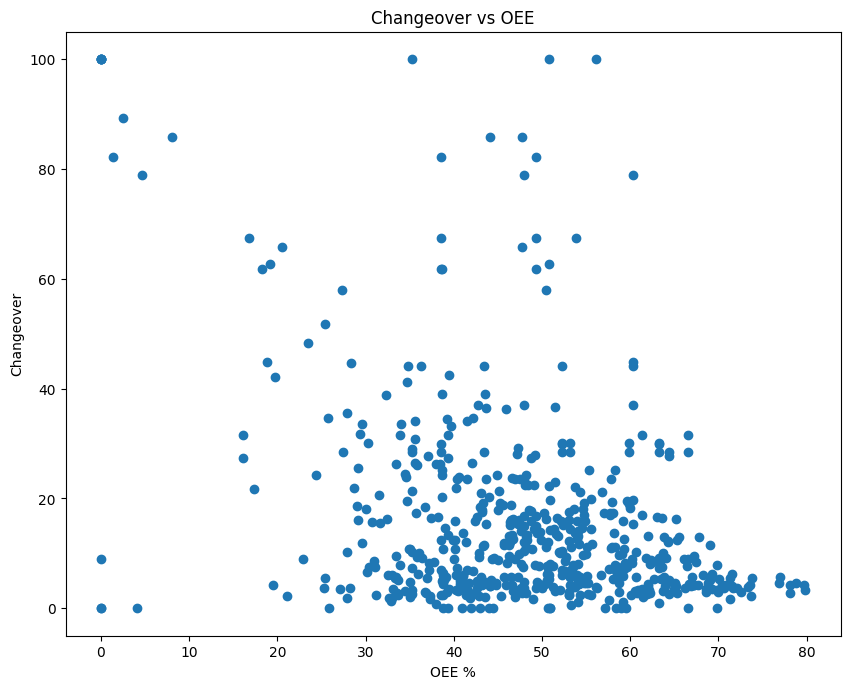

In [98]:
x = df['OEE %']
y = df['Changeover']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Changeover vs OEE')
plt.xlabel('OEE %')
plt.ylabel('Changeover')

Text(0, 0.5, 'Changeover')

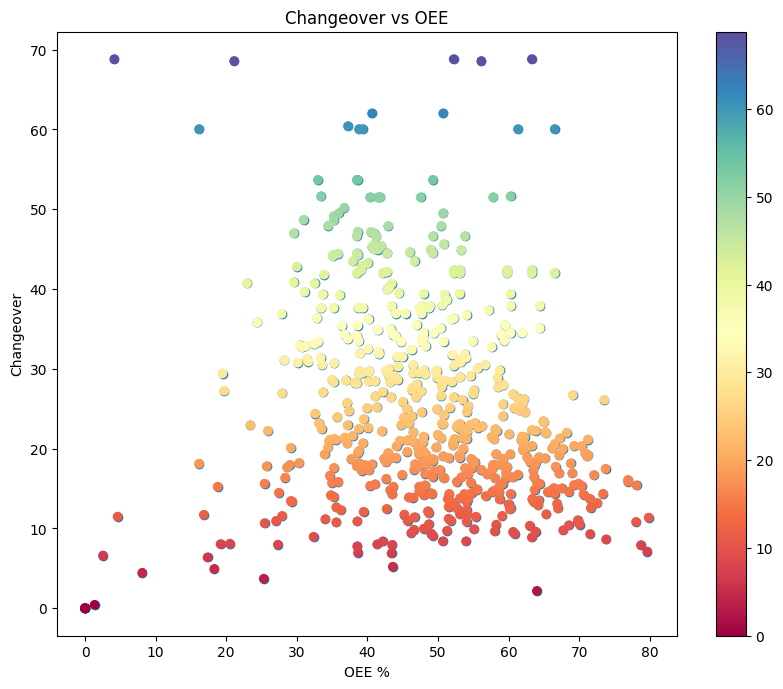

In [99]:
x = df['OEE %']
y = df['Unplanned_tech_loss']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Changeover vs OEE')
plt.scatter(x, y, c=y, cmap='Spectral')
plt.colorbar()
plt.xlabel('OEE %')
plt.ylabel('Changeover')

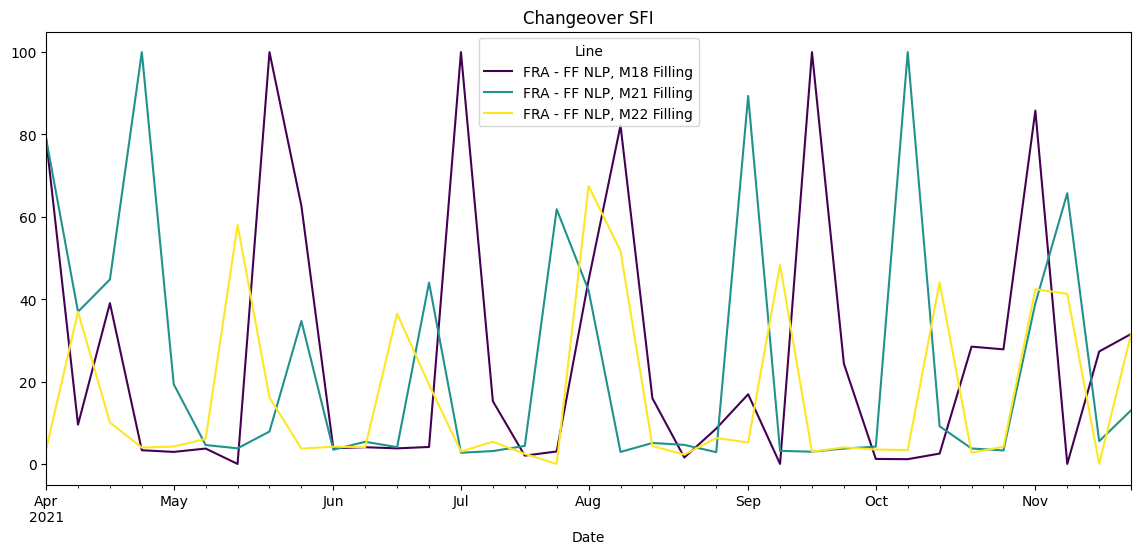

In [100]:
df.pivot_table(index='Date', columns='Line', values='Changeover').filter(regex='M18|M21|M22').plot(figsize=(14,6), title='Changeover SFI', cmap='viridis')

# sns.lineplot(data=df, x='Date', y='Changeover')

In [132]:
pivot_cols = df.pivot_table(index='Date', columns='Line', values='Changeover_rolling_mean').columns
packaging = pivot_cols[~pivot_cols.str.contains('M18|M21|M22')]
filling = pivot_cols[pivot_cols.str.contains('M18|M21|M22')]

In [133]:
px.line(df[df.Line.isin(packaging)], x='Date', y='Changeover_rolling_mean', 
    title='Changeover rolling mean for PACKAGING lines',
    color='Line',
    range_y=(0,100))

In [134]:
px.line(df[df.Line.isin(filling)], x='Date', y='Changeover_rolling_mean', 
    title='Changeover rolling mean for FILLING lines',
    color='Line',
    range_y=(0,100))

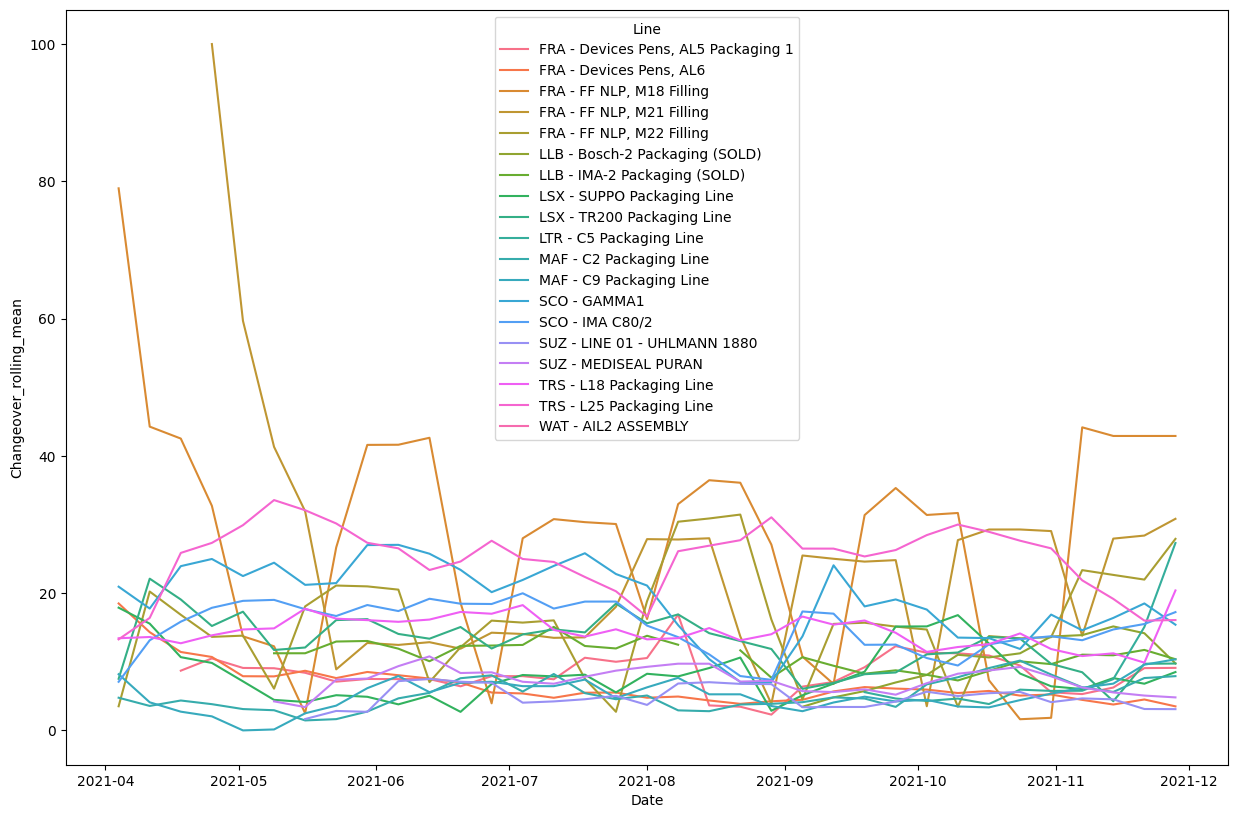

In [124]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Date', y='Changeover_rolling_mean', hue='Line')

In [113]:
fig = px.scatter(df, x='Date', y='Changeover_rolling_mean', 
                 trendline='rolling', 
                 trendline_options=dict(window=4), 
                 trendline_scope='overall',
                title='Changeover Rolling mean')
fig.show()


In [105]:
import plotly.graph_objects as go # or plotly.express as px
# fig = px.lineplot(data=df, x=df['Date'], y=df['Changeover_rolling_mean'], hue='Line')
fig = px.line(df, x='Date', y='Changeover_rolling_mean', color='Line')
# fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)


import dash
from dash import dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [106]:
df.sort_values(['Line','Date'], inplace=True)
df[df.Line == 'FRA - FF NLP, M18 Filling'][['Changeover','Changeover_rolling_mean']]

,Changeover,Changeover_rolling_mean
0,78.978102,78.978102
18,9.540429,44.259265
30,39.041677,42.520069
47,3.324100,32.721077
52,2.918981,13.706297
70,3.733135,12.254473
86,0.000000,2.494054
109,100.000000,26.663029
124,62.659033,41.598042
143,3.818452,41.619371


In [107]:
fig = px.line(df, x='Date', y='Changeover_rolling_mean', 
              color='Line', width=800, height=500,
             title='Rolling Average of Changeover')
fig.show()
file = 'line.html'
path = os.path.join(dir_local, file)
fig.write_html(path)

In [41]:
df.columns

Index(['Unnamed: 0', 'Week', 'Line', 'OEE %', 'Changeover',
       'Unplanned_tech_loss', 'WeekOfYear', 'Year', 'Date', 'Plant',
       'OEE  Start point', 'Way to Prog Target (65%)', 'McL_Start_OEE',
       'rolling_std', 'Best Solution', 'Best Innovation',
       'Improvement Iterations', 'Lessons and Sharing',
       'Team Contribution and Spirit', 'Changeover times',
       'Number of stoppages', 'Better Together', 'Replicate', 'Review_Date',
       'OEE_Diff', 'Changeover_Diff', 'Changeover_rolling_mean', 'sector_1',
       'sector_2', 'sector_3', 'sector_4', 'sector_5', 'sector_6', 'sector_7',
       'sector_8', 'sector_9', 'sector_10', 'sector_11', 'sector_12',
       'sector_13', 'lap_time', 'Plant Line', 'Process'],
      dtype='object')

In [109]:
px.bar(df.groupby('Line').Changeover_rolling_mean.mean().sort_values(ascending=False), 
       orientation='h',
      title='Average Changeover_rolling_mean')

In [111]:
px.bar(df.groupby('Line').Changeover.sum().sort_values(ascending=False), 
       orientation='h',
      title='Using sum of Changeover')

In [112]:
px.bar(df.groupby('Line').Changeover_Diff.sum().sort_values(), 
       orientation='h',
      title='Sum of Changeover Diff')

In [65]:
fig = px.line(df.pivot_table(index='Date', columns='Line', values='Changeover_rolling_mean')[packaging])
fig.show()
file = 'changeoverRollingMean.html'
path = os.path.join(dir_local, file)
fig.write_html(path)